[**Demo %s**](#demo-dimreduce-hello)

We make an image from some text, then reload it as a matrix.

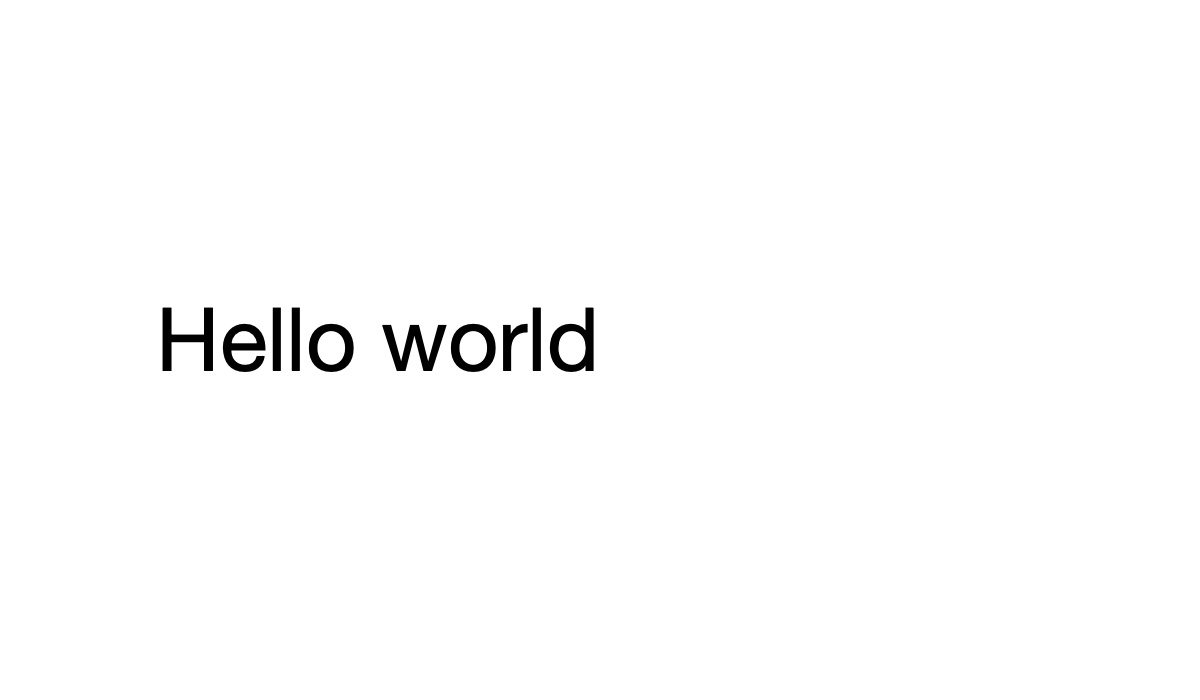

size_A = 1×2 double
   140   884

In [2]:
clf
tobj = text(0, 0,'Hello world','fontsize',44);
ex = get(tobj, 'extent');
axis([ex(1) ex(1) + ex(3) ex(2) ex(2) + ex(4)]), axis off
exportgraphics(gca, 'hello.png', resolution=300)
A = imread('hello.png');
A = double(im2gray(A));
size_A = size(A)

Next we show that the singular values decrease until they reach zero (more precisely, until they are about $\epsilon_\text{mach}$ times the norm of the matrix) at around $k=100$.

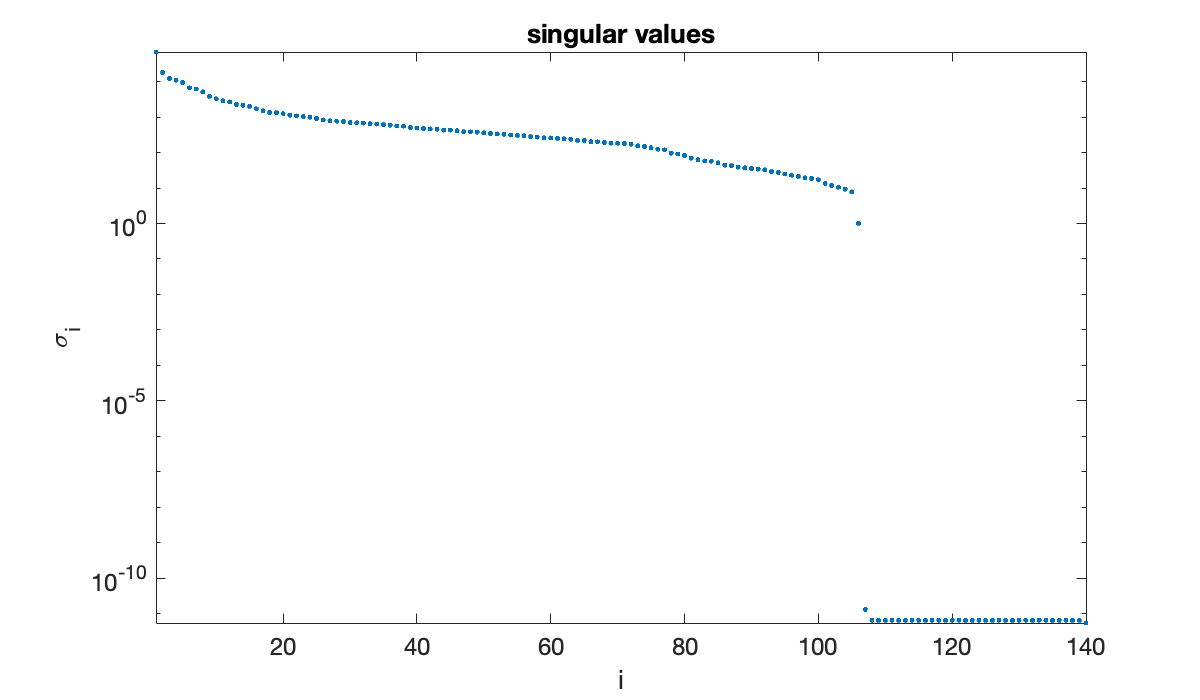

r = 106

In [3]:
[U, S, V] = svd(A);
sigma = diag(S);
semilogy(sigma, '.')
title('singular values'), axis tight 
xlabel('i'), ylabel('\sigma_i') 
r = find(sigma / sigma(1) > 10*eps, 1, 'last')

The rapid decrease suggests that we can get fairly good low-rank approximations.

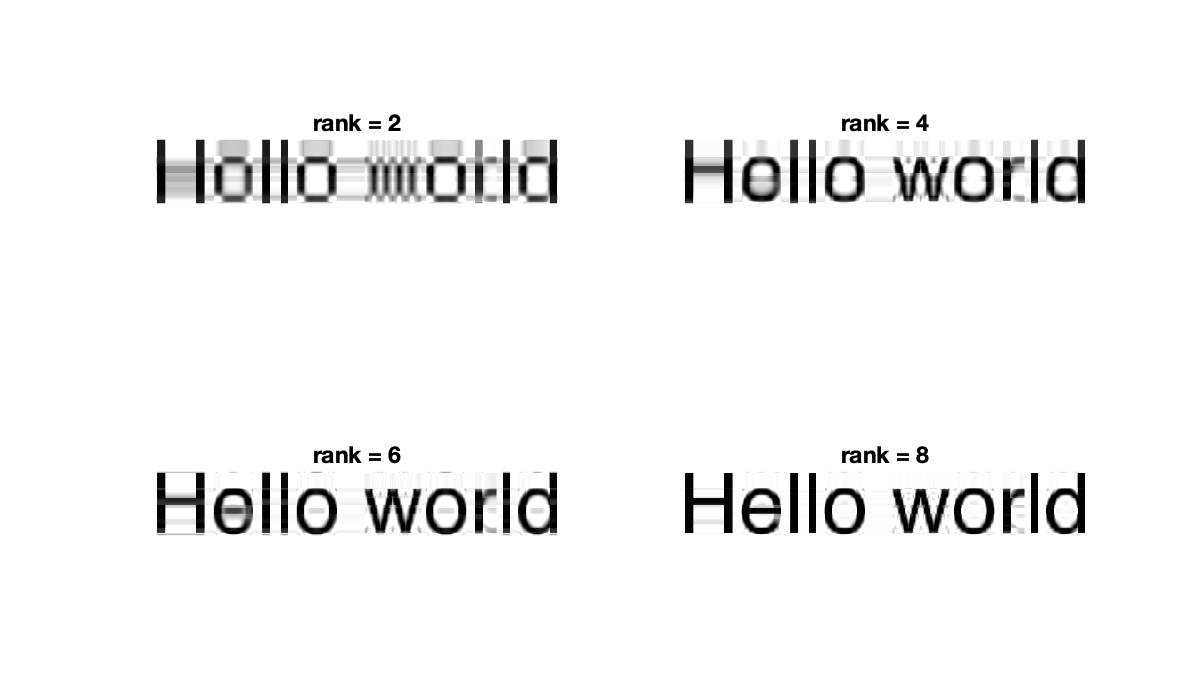

In [4]:
for i = 1:4
    subplot(2, 2, i)
    k = 2*i;
    Ak = U(:, 1:k) * S(1:k, 1:k) * V(:, 1:k)';
    imshow(Ak, [0, 255])
    title(sprintf('rank = %d', k))
end

Consider how little data is needed to reconstruct these images. For rank-9, for instance, we have 9 left and right singular vectors plus 9 singular values, for a compression ratio of better than 12:1.

In [5]:
[m, n] = size(A);
full_size = m * n;
compressed_size = 8 * (m + n + 1);
fprintf("compression ratio: %.1f", full_size / compressed_size)

compression ratio: 15.1